# Exam Code

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..") # Adds higher directory to python modules path.
import pdffuns

# Problem 1 - Bayes Decision Theory (Gaussian)

In [13]:
prior1 = 0.6
prior2 = 0.2
prior3 = 0.2
u1 = np.array([-1.5, -1.5]).T
u2 = np.array([1.5, 1.5]).T
u3 = np.array([0.15, 0.15]).T
M1 = np.array([[0.5, 0],[0, 0.5]])
M2 = np.array([[1, 0],[0, 0.5]])
M3 = np.array([[0.5, 0],[0, 0.5]])

omega1 = stats.multivariate_normal(u1, M1)
omega2 = stats.multivariate_normal(u2, M2)
omega3 = stats.multivariate_normal(u3, M3)

eigval1, eigvec1 = np.linalg.eig(M1)
eigval2, eigvec2 = np.linalg.eig(M2)
eigval3, eigvec3 = np.linalg.eig(M3)

In [14]:
print("Class 1: ")
print("\tCenter at " + str(u1))
print("\tFirst component " + str(eigvec1[0]) + " with eigval " + str(eigval1[0]))
print("\tSecond component " + str(eigvec1[1]) + " with eigval " + str(eigval1[1]))

print("Class 2: ")
print("\tCenter at " + str(u2))
print("\tFirst component " + str(eigvec2[0]) + " with eigval " + str(eigval2[0]))
print("\tSecond component " + str(eigvec2[1]) + " with eigval " + str(eigval2[1]))

print("Class 3: ")
print("\tCenter at " + str(u3))
print("\tFirst component " + str(eigvec3[0]) + " with eigval " + str(eigval3[0]))
print("\tSecond component " + str(eigvec3[1]) + " with eigval " + str(eigval3[1]))

Class 1: 
	Center at [-1.5 -1.5]
	First component [1. 0.] with eigval 0.5
	Second component [0. 1.] with eigval 0.5
Class 2: 
	Center at [1.5 1.5]
	First component [1. 0.] with eigval 1.0
	Second component [0. 1.] with eigval 0.5
Class 3: 
	Center at [0.15 0.15]
	First component [1. 0.] with eigval 0.5
	Second component [0. 1.] with eigval 0.5


### Sketch

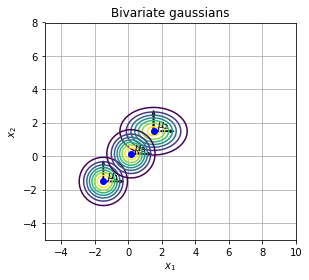

In [15]:
x, y = np.mgrid[-5:10:.01, -5:8:.01]
pos = np.dstack((x, y))

fig, ax = plt.subplots()
fig.gca().set_aspect('equal', adjustable='box')
ax.contour(x, y, omega1.pdf(pos))
ax.contour(x, y, omega2.pdf(pos))
ax.contour(x, y, omega3.pdf(pos))

ax.plot(u1[0], u1[1], 'bo')
ax.annotate("$\mu_1$", (u1 + (0.2, 0.2)))

ax.arrow(u1[0], u1[1], eigvec1[0, 0], eigvec1[0, 1], width = 0.05)
ax.arrow(u1[0], u1[1], eigvec1[1, 0], eigvec1[1, 1], width = 0.05) 

ax.plot(u2[0], u2[1], 'bo')
ax.annotate("$\mu_2$", (u2 + (0.2, 0.2)))

ax.arrow(u2[0], u2[1], eigvec2[0, 0], eigvec2[0, 1], width = 0.05)
ax.arrow(u2[0], u2[1], eigvec2[1, 0], eigvec2[1, 1], width = 0.05)

ax.plot(u3[0], u3[1], 'bo')
ax.annotate("$\mu_3$", (u3 + (0.2, 0.2)))

ax.arrow(u3[0], u3[1], eigvec3[0, 0], eigvec3[0, 1], width = 0.05)
ax.arrow(u2[0], u2[1], eigvec3[1, 0], eigvec3[1, 1], width = 0.05) 


ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Bivariate gaussians')
ax.grid()

## Decision Boundary

### Case 2: $\Sigma = \Sigma$

$$g_i(x) = \boldsymbol{\theta}^{t}_{i} x + \theta_{i0}$$

In [17]:
def linearDiscriminantCase2(M, u, prior):
    boldtheta = np.linalg.inv(M)@u
    theta0 = (((-1/2)*u.T) @ np.linalg.inv(M) @ u) + np.log(prior) 
    return boldtheta, theta0

boldtheta, theta0 = linearDiscriminantCase2(M1, u1, prior1)
print("g1 = {}x_1 + {}x_2 + {}".format(boldtheta[0], boldtheta[1], theta0))
boldtheta, theta0 = linearDiscriminantCase2(M2, u2, prior2)
print("g2 = {}x_1 + {}x_2 + {}".format(boldtheta[0], boldtheta[1], theta0))
boldtheta, theta0 = linearDiscriminantCase2(M3, u3, prior3)
print("g3 = {}x_1 + {}x_2 + {}".format(boldtheta[0], boldtheta[1], theta0))

g1 = -3.0x_1 + -3.0x_2 + -5.0108256237659905
g2 = 1.5x_1 + 3.0x_2 + -4.9844379124341005
g3 = 0.3x_1 + 0.3x_2 + -1.6544379124341002


### Case 3: $\Sigma = \text{arbitrary}$

In [19]:
def linearDiscriminantCase3(M, u, prior):
    Theta = (-1/2) * np.linalg.inv(M)
    theta = np.linalg.inv(M)@u
    theta0 = (((-1/2)*u.T) @ np.linalg.inv(M) @ u) - (-1/2)*np.log(np.linalg.det(M)) + np.log(prior) 
    return Theta, theta, theta0

Theta, theta, theta0 = linearDiscriminantCase3(M1, u1, prior1)
print("g1 = {}x_1^2 + {}x_2^2 + {}x_1 + {}x_2 + {}".format(Theta[0, 0], Theta[1, 1], theta[0], theta[1], theta0))
Theta, theta, theta0 = linearDiscriminantCase3(M2, u2, prior2)
print("g2 = {}x_1^2 + {}x_2^2 + {}x_1 + {}x_2 + {}".format(Theta[0, 0], Theta[1, 1], theta[0], theta[1], theta0))
Theta, theta, theta0 = linearDiscriminantCase3(M3, u3, prior3)
print("g3 = {}x_1^2 + {}x_2^2 + {}x_1 + {}x_2 + {}".format(Theta[0, 0], Theta[1, 1], theta[0], theta[1], theta0))

g1 = -1.0x_1^2 + -1.0x_2^2 + -3.0x_1 + -3.0x_2 + -5.703972804325936
g2 = -0.5x_1^2 + -1.0x_2^2 + 1.5x_1 + 3.0x_2 + -5.331011502714073
g3 = -1.0x_1^2 + -1.0x_2^2 + 0.3x_1 + 0.3x_2 + -2.347585092994046


## Bayes Decision Theory with loss

We have $\omega_1$ for toxic mussels and $\omega_2$ for non-toxic

And the following losses:

$$
\lambda(\alpha_1 | \omega_2) = 250 \text{ i.e throwing away a good mussle}
$$

$$
\lambda(\alpha_2 | \omega_1) = 100000 \text{ i.e accidentally poison a customer}
$$

in this case, the weights are the cost in NOK.

In [7]:
## NB!!! Scale and Variance are two different parameters

u1 = 0.4
M1 = 0.0001

u2 = 0.2
M2 = 0.0001

prior1 = 1/25 
prior2 = 24/25

omega1 = stats.multivariate_normal(u1, M1)
omega2 = stats.multivariate_normal(u2, M1)

a1w2 = 250
a2w1 = 100000

discriminant = lambda x: a1w2*((omega2.pdf(x)*prior2)/(omega1.pdf(x)*prior1 + omega2.pdf(x)*prior2)) - \
    a2w1*((omega1.pdf(x)*prior1)/(omega1.pdf(x)*prior1 + omega2.pdf(x)*prior2))

In [8]:
from scipy.optimize import fsolve
root = fsolve(discriminant, x0=0.3)[0]
print("root: {}".format(root))

root: 0.29859329464162


### Find expected cost

In [9]:
cost = a2w1*omega1.cdf(root) + a1w2*(1-omega2.cdf(root))
print("Minimum cost: {}".format(cost))

Minimum cost: 1.8229415364509368e-19


# Problem 2

## Parametric estimation

In [10]:
D1 = np.array(
    [
        [1-(1/np.sqrt(2)), 1-(1/np.sqrt(2))],
        [1+((np.sqrt(3)+1)/(2*np.sqrt(2))), 1-((np.sqrt(3)-1)/(2*np.sqrt(2)))],
        [1-((np.sqrt(3)-1)/(2*np.sqrt(2))), 1+((np.sqrt(3)+1)/(2*np.sqrt(2)))]
    ]
)

D2 = np.array(
    [
        [4+(1/np.sqrt(2)), 4+(1/np.sqrt(2))],
        [4-((np.sqrt(3)+1)/(2*np.sqrt(2))), 4+((np.sqrt(3)-1)/(2*np.sqrt(2)))],
        [4+((np.sqrt(3)-1)/(2*np.sqrt(2))), 4-((np.sqrt(3)+1)/(2*np.sqrt(2)))]
    ]
)

x = np.array(
    [2.75, 2.75]
)

plt.scatter(D1[:, 0], D1[:, 1])
plt.scatter(D2[:, 0], D2[:, 1])
plt.scatter(x[0], x[1])


# MLE Estimate

# Prior distributions
prior1 = len(D1) / (len(D1)+len(D2))
prior2 = len(D2) / (len(D1)+len(D2))

print("Prior 1: " + "\n\t " + str(prior1))
print("Prior 2: " + "\ng\t " + str(prior2))

# Mean mle estimate
u1 = np.mean(D1, axis=0)
u2 = np.mean(D2, axis=0)

print("Mean 1: " + "\n\t " + str(u1))
print("Mean 2: " + "\n\t " + str(u2))

# Covariance matrix
M1 = np.cov(D1.T, bias=True)
M2 = np.cov(D2.T, bias=True)

print("Cov 1: " + "\n " + str(sigma1))
print("Cov 2: " + "\n " + str(sigma2))

Prior 1: 
	 0.5
Prior 2: 
g	 0.5
Mean 1: 
	 [1. 1.]
Mean 2: 
	 [4. 4.]


NameError: name 'sigma1' is not defined

### KNN Density Estimation

In [73]:
def g(r, k, n, prior):
    return prior * ((k/n)/(np.pi*r**2))

print("g1: " + str(g(2.7607, 2, 3, 3/7)))
print("g2: " + str(g(1.5811, 2, 4, 4/7)))

g1: 0.011932835465693724
g2: 0.03638005954972379


# Problem 3

## Linear Discriminant Function using regression

### Why regression is not fit 

This would assume

$$
x_2 = F(x_1, \beta) + \epsilon
$$

but this does not contain any information of the classes and would try to estimate a function that takes feature 1 as input and get feature 2 as output. 

What we can do though, is to encode the classes as $-1$ and $+1$ and use regression to fit a function to these classes.

$$
Y = F(\boldsymbol{x}, \beta) + \epsilon
$$

### Estimating $F$

We want to estimate the discriminant function using the least squares method

we have 
$$
F: g(\boldsymbol{x}) = \beta^T \boldsymbol{x}
$$

and by the method of least squares we know that this is solved by:

$$
\beta = (X^T X)^{-1} X^T Y
$$

### Proof:

Loss function (squares)

$$
L(\beta) = ||Y - X\beta|| = (Y - X\beta)^T (Y - X\beta) = Y^T Y - X^T \beta^T Y - Y^T X \beta + \beta^T X^T X \beta = Y^T Y - 2 \beta^T X^T Y  + \beta^T X^T X \beta
$$

Differentiate and set so 0

$$
\frac{\partial L}{\partial \beta} = -2 X^T Y + 2 X^T X \beta= 0
$$


We end up with 

$$
\beta = (X^T X)^{-1} X^T Y
$$

In [38]:
# NBNBNB!
# Feature vectors and labels may vary. Doublecheck!

X = np.array(
    [
        [3, 2, 1],
        [3, 1.5, 1],
        [2.5, 3, 1],
        [1, 2, 1],
        [2, 1, 1],
        [1.1, 3, 1]
    ]
)

Y = np.array(
    [
        [1],
        [1],
        [1],
        [-1],
        [-1],
        [-1]
    ]
)

prior1 = np.sum(y==-1)/len(y)
prior2 = np.sum(y==1)/len(y)

print("X.T X: \n" + str(X.T @ X))
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
print("Beta: \n" + str(beta))
print("g = {}x_1 + {}x_2 + {}".format(beta[0][0], beta[1][0], beta[2][0]))

X.T X: 
[[30.46 25.3  12.6 ]
 [25.3  29.25 12.5 ]
 [12.6  12.5   6.  ]]
Beta: 
[[ 1.22302158]
 [ 0.51798561]
 [-3.64748201]]
g = 1.2230215827338116x1 + 0.5179856115107909x2 + -3.6474820143884847


In [43]:
beta @ np.array([4, 6, 3])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

and we get

$$
x_2≈5.455300127713920 - 1.679438058748404 x_1
$$

### Plot data

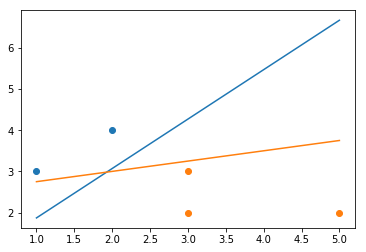

In [464]:
X1 = np.array(
    [
        [1, 3],
        [2, 4]
    ]
)

X2 = np.array(
    [
        [3, 2],
        [3, 3],
        [5, 2]
    ]
)


def f(x):
    return 0.67 + 1.2*x

def f2(x):
    return 2.5 + 0.25*x

plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X2[:, 0], X2[:, 1])
plt.plot(np.linspace(1, 5), f(np.linspace(1, 5)))
plt.plot(np.linspace(1, 5), f2(np.linspace(1, 5)))

## Least Mean Square Method

In [7]:
theta = np.array([0, 0, 0])

df = pdffuns.LMS(X, Y, theta, threshhold=1, learning_rate=1)

In [8]:
df

,i,k,Theta,Eta,Condition,Theta*
0,1,1,"[0, 0, 0]",1.000000,1.732051,"[1.0, 1.0, 1.0]"
1,2,2,"[1.0, 1.0, 1.0]",0.500000,6.633250,"[-2.0, -6.0, -2.0]"
2,3,3,"[-1.0, -5.0, -1.0]",0.333333,18.708287,"[5.0, 10.0, 15.0]"
3,4,4,"[4.0, 5.0, 14.0]",0.250000,86.085078,"[-18.25, -18.25, -82.12]"
4,5,5,"[-14.25, -13.25, -68.12]",0.200000,91.575452,"[29.71, 74.28, 44.57]"
5,6,6,"[15.46, 61.03, -23.55]",0.166667,93.643679,"[-21.48, -64.45, -64.45]"
6,7,7,"[-6.02, -3.42, -88.0]",0.142857,267.538270,"[52.47, 157.41, 209.87]"
7,8,1,"[46.45, 153.99, 121.87]",0.125000,69.565656,"[-40.16, -40.16, -40.16]"
8,9,2,"[6.29, 113.83, 81.71]",0.111111,157.904506,"[-47.61, -142.83, -47.61]"
9,10,4,"[-41.32, -29.0, 34.1]",0.100000,39.684042,"[-8.41, -8.41, -37.86]"


## Batch Perceptron

In [2]:
import pandas as pd
X = np.array(
    [
        [-3, -2],
        [1, -1],
        [4, 1]
    ]
)

y = np.array(
    [
        [1], 
        [1],
        [-1]
    ]
)

theta = np.array(
    [0, 0]
)

lrate = lambda x: 1
threshold = 1

df = pdffuns.batchPerceptron(X, y, theta, threshold, lrate)

In [3]:
df

,i,Theta,Chi,mu,New Theta,Misclass
1,1,"[0, 0]","[-1.0, -1.0, -1.0]",1,"[2, -2]","[-2, 4, 6]"
2,2,"[2, -2]","[-2, 4, 6]",1,"[-3, -2]","[11, 3, -8]"
3,3,"[-1, -4]","[11, 3, -8]",1,"[4, 1]","[-3, 6, 9]"
4,4,"[3, -3]","[-3, 6, 9]",1,"[-3, -2]","[10, 5, -5]"
5,5,"[0, -5]","[10, 5, -5]",1,"[4, 1]","[-4, 8, 12]"
6,6,"[4, -4]","[-4, 8, 12]",1,"[-3, -2]","[9, 7, -2]"
7,7,"[1, -6]","[9, 7, -2]",1,"[4, 1]","[-5, 10, 15]"
8,8,"[5, -5]","[-5, 10, 15]",1,"[-3, -2]","[8, 9, 1]"
9,9,"[2, -7]",None,None,None,None


### Neural Network Forward Computations

In [121]:
X = np.array(
    [
        [-1, -1],
        [-1, 1],
        [1, -1],
        [1, 1]
    ]
)

Y = np.array([-1, 1, 1, -1])

W1 = np.array(
    [
        [1, 1],
        [1, 1]
    ]
)

W2 = np.array(
    [
        [0.7, -0.4],
    ]
)

b1 = np.array([0.5, -1.5])
b2 = np.array([-1])

y = np.vectorize(lambda x: -1 if (x < 0) else 1)

# Layer 1
y1 = y((W1@X.T).T + b1)

# Layer 2
y2 = y(W2@y1.T + b2)

print("predict {}".format(y2.reshape(-1)))
print("actual {}".format(Y))

predict [-1  1  1 -1]
actual [-1  1  1 -1]


In [106]:
for x in (W1@X.T).T + b1:
    prun

1

# Problem 4 

## Performance Metrics for classification

In [52]:
confusionmatrix = np.array([[5, 0, 1], [0, 5, 1], [2, 0, 16]])

In [53]:
def recall(matrix):
    for i in range(len(matrix)):
        r = matrix[i, i] / np.sum(matrix[i, :])
        print("R{}: {}".format(i+1, r))

def precision(matrix):
    for i in range(len(matrix)):
        p = matrix[i, i] / np.sum(matrix[:, i])
        print("P{}: {}".format(i+1, p))

def accuracy(matrix):
    p = np.sum(np.diag(confusionmatrix)) / np.sum(matrix[:, :])
    print("A: {}".format(p))

recall(confusionmatrix)
precision(confusionmatrix)
accuracy(confusionmatrix)

R1: 0.8333333333333334
R2: 0.8333333333333334
R3: 0.8888888888888888
P1: 0.7142857142857143
P2: 1.0
P3: 0.8888888888888888
A: 0.8666666666666667


In [54]:
confusionmatrix = np.array([[2, 0, 4], [0, 2, 4], [0, 0, 18]])
recall(confusionmatrix)
precision(confusionmatrix)
accuracy(confusionmatrix)

R1: 0.3333333333333333
R2: 0.3333333333333333
R3: 1.0
P1: 1.0
P2: 1.0
P3: 0.6923076923076923
A: 0.7333333333333333


In [55]:
confusionmatrix = np.array([[5, 0, 1], [0, 5, 1], [2, 4, 12]])
recall(confusionmatrix)
precision(confusionmatrix)
accuracy(confusionmatrix)

R1: 0.8333333333333334
R2: 0.8333333333333334
R3: 0.6666666666666666
P1: 0.7142857142857143
P2: 0.5555555555555556
P3: 0.8571428571428571
A: 0.7333333333333333


In [65]:
## Mean Estimate
accuracies = np.array([0.8333333333333334, 0.7333333333333333, 0.7333333333333333])
recall1 = np.array([0.8333333333333334, 0.3333333333333333, 0.8333333333333334])
recall2 = np.array([0.8333333333333334, 0.3333333333333333, 0.8333333333333334])
recall3 = np.array([0.8888888888888888, 1.0, 0.6666666666666666])
precision1 = np.array([0.7142857142857143, 1.0, 0.7142857142857143])
precision2 = np.array([0.8333333333333334, 0.3333333333333333, 0.8333333333333334])
precision3 = np.array([0.8888888888888888, 1.0, 0.6666666666666666])

np.mean(precision1)
2*np.std(precision1)

0.2693740118805895

In [60]:
confusionmatrix = np.array([[70, 30], [40, 960]])
recall(confusionmatrix)
precision(confusionmatrix)
accuracy(confusionmatrix)

R1: 0.7
R2: 0.96
P1: 0.6363636363636364
P2: 0.9696969696969697
A: 0.9363636363636364


In [61]:
confusionmatrix = np.array([[40, 60], [80, 920]])
recall(confusionmatrix)
precision(confusionmatrix)
accuracy(confusionmatrix)

R1: 0.4
R2: 0.92
P1: 0.3333333333333333
P2: 0.9387755102040817
A: 0.8727272727272727


## Partition evaluation

In [248]:
D = np.array(
    [
        [4, 5],
        [5, 6],
        [4, 5],
        [7, 6],
        [6, 4]
    ]
)

partition1 = np.array(
    [2, 1, 2, 1, 2]
)

partition2 = np.array(
    [2, 1, 1, 2, 1]
)

partition1_m1 = np.mean(D[partition1==1], axis=0)
partition1_m2 = np.mean(D[partition1==2], axis=0)


partition2_m1 = np.mean(D[partition2==1], axis=0)
partition2_m2 = np.mean(D[partition2==2], axis=0)

# Sum of squared errors Partition 1
Je1 = np.linalg.norm(D[partition1==1] - partition1_m1)**2 + \
      np.linalg.norm(D[partition1==2] - partition1_m2)**2

Je2 = np.linalg.norm(D[partition2==1] - partition2_m1)**2 + \
      np.linalg.norm(D[partition2==2] - partition2_m2)**2

print("Partition 1:")
print("\tCluster 1 mean: {}".format(partition1_m1))
print("\tCluster 2 mean: {}".format(partition1_m2))
print("\tLoss: {}".format(Je1))

print("Partition 2:")
print("\tCluster 1 mean: {}".format(partition2_m1))
print("\tCluster 2 mean: {}".format(partition2_m2))
print("\tLoss: {}".format(Je2))

print("Best partition:")
print("\tPartition 1") if (Je1 < Je2) else print("\tPartition 2")

Partition 1:
	Cluster 1 mean: [6. 6.]
	Cluster 2 mean: [4.66666667 4.66666667]
	Loss: 5.333333333333334
Partition 2:
	Cluster 1 mean: [5. 5.]
	Cluster 2 mean: [5.5 5.5]
	Loss: 9.0
Best partition:
	Partition 1


## Cluster Change Iteration

By moving a sample $\hat{x}$ from $D_i$ to $D_j$ we get changes in $J_j$ and $J_i$ corre-
sponding to 

$$
\Delta J_i = \frac{n_i}{n_i - 1} ||x-m_i||^2
$$

$$
\Delta J_j = \frac{n_j}{n_j + 1} ||x-m_j||^2
$$

Decision rule: Move from $D_i$ to $D_j$ if $|\Delta J_i| > |\Delta J_j|$



In [349]:
idx = 3

partition = partition1[idx]
xhat = D[idx, :]
rmidx = np.where(np.prod(D[partition1==partition] == D[idx, :], axis=0) == 1)[0][0]
Dtmp = np.delete(D[partition1==partition], rmidx, axis=0)
tmpm1 = np.mean(Dtmp, axis=0)
Dtmp = np.vstack([D[partition1!=partition], xhat])
tmpm2 = np.mean(Dtmp, axis=0)

ni = np.sum(partition1==partition)
nj = np.sum(partition1!=partition)
reduction = (ni/(ni-1)) * np.linalg.norm(partition1_m1-xhat)**2
increase = (nj/(nj+1)) * np.linalg.norm(partition1_m2-xhat)**2

In [350]:
reduction

2.0

In [351]:
increase

5.416666666666664